<a href="https://colab.research.google.com/github/jmurphyGoKnights22/Fake_News_Classifier/blob/main/falsenewsclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Please make sure the 'news.csv' is located in the same place as this notebook

# **This notebook is by James Murphy**

## 1. Load Data and perform basic EDA

In [32]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install
!git clone https://github.com/jmurphyGoKnights22/Fake_News_Classifier.git

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (3.1.4).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 74 not upgraded.
Updated Git hooks.
Git LFS initialized.
Cloning into 'Fake_News_Classifier'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 2), reus

In [33]:
cd Fake_News_Classifier

/content/Fake_News_Classifier/Fake_News_Classifier


In [34]:
!git lfs pull --include="news.csv"

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import sklearn
import string

from scipy import stats

import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

%matplotlib inline

filename = 'news.csv'

In [36]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
messages = [line.rstrip() for line in open(filename)]
for message in messages[:10]:
    print(message)
    print('\n')

stemmer = LancasterStemmer()
stopwordList = stopwords.words('english')

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [38]:
data = pd.read_csv(filename, sep = "\t", names = ["title", "text", "subject", "date", "target"])

In [39]:
data['text'].head(10).apply(text_process)

0                                               [text]
1    [washington, reut, the, head, conserv, republ,...
2    [washington, reut, transgend, peopl, allow, fi...
3    [washington, reut, the, spec, counsel, investi...
4    [washington, reut, trump, campaign, adv, georg...
5    [seattlewashington, reut, presid, donald, trum...
6    [west, palm, beach, flawashington, reut, the, ...
7    [west, palm, beach, fla, reut, presid, donald,...
8    [the, follow, stat, post, ver, twit, account, ...
9    [the, follow, stat, post, ver, twit, account, ...
Name: text, dtype: object

In [40]:
data.head()

,title,text,subject,date,target
0,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1


In [41]:
data.tail()

,title,text,subject,date,target
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44898,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [42]:
missingData = data.isnull().sum().to_frame('null')
missingData.sort_values("null", inplace=True, ascending = False)
missingData

,null
title,0
text,0
subject,0
date,0
target,0


In [43]:
percentMissing = data.isnull().mean() * 100
percentMissing = percentMissing.to_frame("nulls")

percentMissing.sort_values("nulls", inplace = True, ascending = False)
percentMissing

,nulls
title,0.0
text,0.0
subject,0.0
date,0.0
target,0.0


There is no null data

In [44]:
data = data.drop(0)

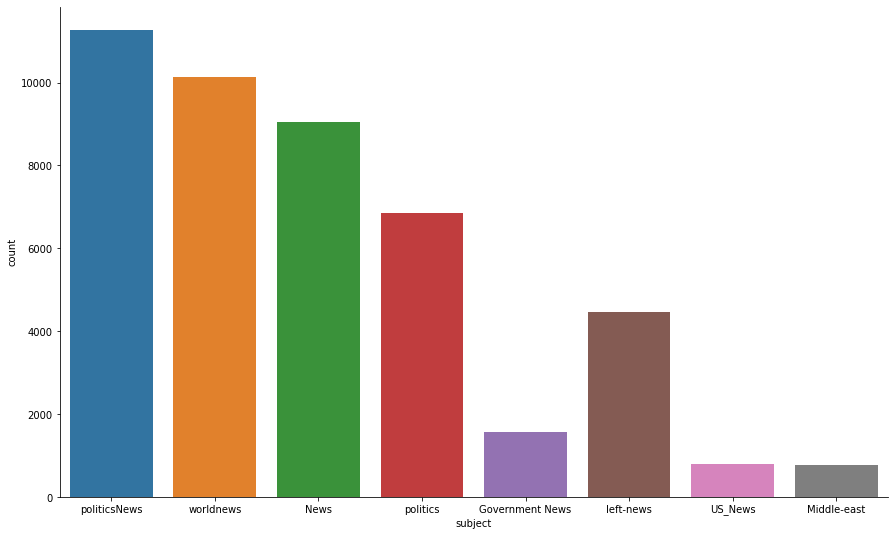

In [45]:
plot = sns.catplot(x = "subject", data = data, kind = "count")
plt.gcf().set_size_inches(15, 8)


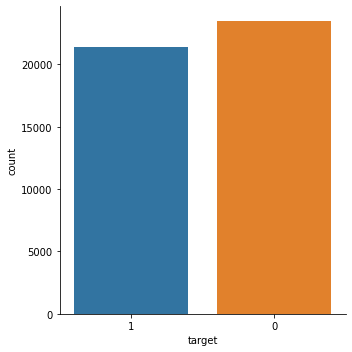

In [46]:
plot = sns.catplot(x = "target", data = data, kind = "count")


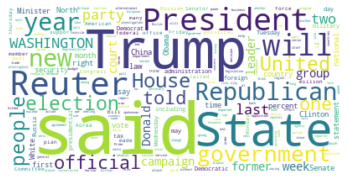

In [47]:
trueText = data[data["target"] == "1"]
textTrue = " ".join(cat for cat in trueText.text)
word_cloud_True = WordCloud(collocations = False, background_color = 'white').generate(textTrue)
plt.imshow(word_cloud_True, interpolation='bilinear')
plt.axis("off")
plt.show()

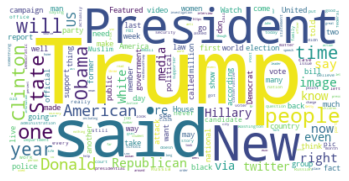

In [48]:
falseText = data[data["target"] == "0"]
textFalse = " ".join(cat for cat in falseText.text)
word_cloud_False = WordCloud(collocations = False, background_color = 'white').generate(textFalse)
plt.imshow(word_cloud_False, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems that a lot of the words that are larger in the wordcloud of the true text is even larger in the false text. Some are smaller but 'New' seems to be much larger in the false text than the true text.

In [49]:
columns = ['subject', 'title', 'text']
data['AllText'] = data[columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
saveForLater = data.copy()
saveForLater.head()

,title,text,subject,date,target,AllText
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub..."
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...


In [50]:
data = data.drop(columns=['title', 'text', 'subject'])
data.tail()

,date,target,AllText
44894,"January 16, 2016",0,Middle-east_McPain: John McCain Furious That I...
44895,"January 16, 2016",0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...
44896,"January 15, 2016",0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...
44897,"January 14, 2016",0,Middle-east_How to Blow $700 Million: Al Jazee...
44898,"January 12, 2016",0,Middle-east_10 U.S. Navy Sailors Held by Irani...


In [51]:
data['length'] = data['AllText'].apply(len)
data.tail()

,date,target,AllText,length
44894,"January 16, 2016",0,Middle-east_McPain: John McCain Furious That I...,3311
44895,"January 16, 2016",0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...,1778
44896,"January 15, 2016",0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...,25163
44897,"January 14, 2016",0,Middle-east_How to Blow $700 Million: Al Jazee...,2765
44898,"January 12, 2016",0,Middle-east_10 U.S. Navy Sailors Held by Irani...,5345


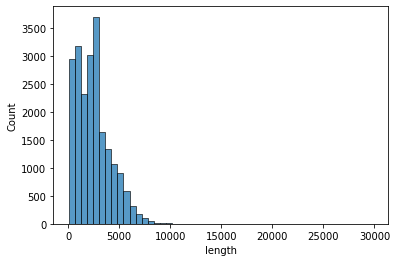

In [52]:
trueText = data[data["target"] == "1"]
sns.histplot(x='length',data=trueText, bins=50)

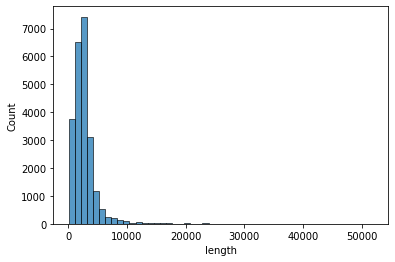

In [53]:
falseText = data[data["target"] == "0"]
sns.histplot(x='length',data=falseText, bins=50)

The average length appears to be around 4000. The lengths are skewed right for both. The lengths of real news contains more longer texts than fake news.

Term Frequency inverse document frequency.

Simply put, the frequency of times a word appears in a document of a given length. Inverse is the frequenct of times a term doesn't appear in a document of a given length.

We user a countVectorizer to extract the features from our text
This is then followed by a TfidTransformer.

Or, we can simply do the combination of both using TfidVectorizer.


## 2. Train Test Split

In [54]:
x= data[['date','AllText', 'length']]
y = pd.DataFrame(data['target'])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

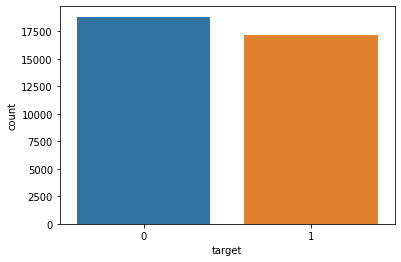

In [56]:
sns.countplot(x = "target", data = y_train)

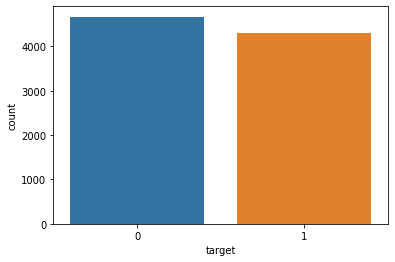

In [57]:
sns.countplot(x = "target", data = y_test)

## 3. Training and testing Fake News Classifier using MultinomialNB

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [59]:
pipeline =  Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [60]:
pipeline.fit(X_train['AllText'],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f059c753e60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
predictions = pipeline.predict(X_test['AllText'])

In [62]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4695
           1       0.95      0.96      0.95      4285

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [63]:
print(confusion_matrix(y_test, predictions))

[[4486  184]
 [ 209 4101]]


The model is one percent better at identifying fake news compared to true news. Overall, the model is good at recognizing both with high confidence. 

In [64]:
# Source of Example: https://apnews.com/article/russia-ukraine-zelenskyy-kyiv-congress-adam-schiff-b26d709f1e5e3cba71c3b67e47638746
realnewsExample = "worldNews_Pelosi, in surprise Kyiv trip, vows unbending US support_WARSAW, Poland (AP) — A top-level U.S. congressional delegation led by House Speaker Nancy Pelosi praised the “ferocity” and resolve of Ukrainians face to face with their leader in a weekend visit to Kyiv undertaken in extraordinary secrecy.Pelosi, second in line to the presidency after the vice president, was the most senior American lawmaker to visit Ukraine since Russia’s war began more than two months ago. Only days earlier, Russia bombed the Ukrainian capital while the U.N. secretary-general was there. Pelosi and the half dozen U.S. lawmakers with her met Ukrainian President Volodymyr Zelenskyy and his top aides for three hours late Saturday to voice American solidarity with the besieged nation and get a first-hand assessment of the effort as she works to steer a massive new Ukraine aid package through Congress.“Our commitment is to be there for you until the fight is done,” Pelosi is seen telling Zelenskyy in a video of the meeting released by his office. “We are on a frontier of freedom and your fight is a fight for everyone. Thank you for your fight for freedom.”Pelosi told reporters in Poland on Sunday the delegation was proud to convey to Zelenskyy “the message of unity from the Congress of the United States, a message of appreciation from the American people for his leadership and admiration for the people of Ukraine for their courage.” She is set to meet Polish President Andrzej Duda, a NATO ally, on Monday in Warsaw. The delegation’s trip to Kyiv was not disclosed until the party was safely out of Ukraine. Nor were details given on how they got to the capital and back. A week earlier, Secretary of State Anthony Blinken and Defense Secretary Lloyd Austin Zelenskyy traveled to Kyiv overland from Poland for talks with Zelenskyy. The members of the congressional delegation were unanimous in praising Ukraine’s defenses, in painting the battle of one as good against evil and in assuring continued long-term U.S. military, humanitarian and economic support.“This is a struggle of freedom against tyranny,” said Rep. Adam Schiff, chairman of the House Intelligence committee. The trip came two days after U.S. President Joe Biden asked Congress for $33 billion to bolster Ukraine’s fight against Russia, more than twice the size of the initial $13.6 billion aid measure that now is almost drained. The measure is designed to signal to Russian President Vladimir Putin that U.S. weaponry and other forms of assistance aren’t going away. Rep. Jason Crow of Colorado, a veteran and a member of the House intelligence and armed services committees, said he went to Ukraine with three areas of focus: “Weapons, weapons and weapons.”“We have to make sure the Ukrainians have what they need to win,” he said. “What we have seen in the last two months is their ferocity, their intense pride, their ability to fight and their ability to win if they have the support to do so.” Scores of U.S. lawmakers are trekking to the region to witness first hand the war’s toll and shore up U.S. troops in the broader region. Pelosi’s delegation was notable for the seniority of its members. The trip also underscored Pelosi’s stature as an ambassador on the global stage. The speaker is well known in Europe and elsewhere abroad, typically leads travel delegations and keeps close relations with allies overseas. Though all in the delegation were Democrats, the U.S. Congress has displayed a rare and, so far, lasting bipartisan resolve to back Ukraine as it battles Russia. Pelosi has branded the war a conflict between democracy and autocracy and vowed Washington will stand with Ukraine until it defeats the invaders. Pelosi came with Rep. Gregory Meeks, chair of the House Foreign Affairs Committee; Rep. Jim McGovern of Massachusetts, chair of the House Rules Committee; Reps. Barbara Lee of California and Bill Keating of Massachusetts, Crow and Schiff. “This is a time we stand up for democracy or we allow autocracy to rule the day,” Meeks said. Crow said the U.S. “is in this to win, and we will stand with Ukraine until victory is won.” Schiff, as intelligence panel chair, said he was particularly focused on making sure Ukraine is getting the U.S. intelligence support it needs to “defeat Russian forces.” The delegation’s visit followed those of several EU officials and European heads of state who have gone to show solidarity with Zelenskyy, starting with the March 15 surprise visit by the leaders of NATO members Czech Republic, Poland and Slovenia. More recently, U.N. Secretary-General António Guterres met Zelenskyy in Kyiv on Thursday. A missile strike rained down on the capital barely an hour after their joint press conference, an attack Kyiv’s mayor said was Putin giving his “middle finger” to Guterres. The delegation was visiting southeast Poland and going later to the capital. Poland has received more than 3 million refugees from Ukraine since Russia launched its war on Feb. 24. “We look forward to thanking our Polish allies for their dedication and humanitarian efforts,” Pelosi said. McGovern said Russia’s war had repercussions far beyond Ukraine and was exacerbating a food crisis that would be disastrous for poor people across the globe. “Putin’s brutal war is no longer only a war against the people of Ukraine,” McGovern said. “It’s also a war against the world’s most vulnerable.” He added: “I don’t think that Putin cares if he starves the world.”"
realPrediction = pipeline.predict([realnewsExample])

In [65]:
print(realPrediction)

['1']


It was predicted correctly

## 4. Training and Testing a Deep Neural Network

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
pipelineNN =  Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,150,100), verbose=2)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [68]:
pipelineNN.fit(X_train['AllText'],y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.11471758
Iteration 2, loss = 0.00184344
Iteration 3, loss = 0.00038761
Iteration 4, loss = 0.00029522
Iteration 5, loss = 0.00026247
Iteration 6, loss = 0.00024133
Iteration 7, loss = 0.00022522
Iteration 8, loss = 0.00021200
Iteration 9, loss = 0.00020063
Iteration 10, loss = 0.00019062
Iteration 11, loss = 0.00018166
Iteration 12, loss = 0.00017357
Iteration 13, loss = 0.00016614
Iteration 14, loss = 0.00015921
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f059c753e60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 150, 100), verbose=2))])

In [69]:
predictionsNN = pipelineNN.predict(X_test['AllText'])

In [70]:
print(classification_report(predictionsNN,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4657
           1       1.00      0.99      1.00      4323

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [71]:
print(confusion_matrix(y_test, predictionsNN))

[[4645   25]
 [  12 4298]]


The model is extremely accurate at detecting fake and true news. It does raise concern that the model has such incredibly low bias that it could suffer from high variance as complex models tend to.

In [72]:
realPredictionNN = pipelineNN.predict([realnewsExample])

In [73]:
print(realPredictionNN)

['1']
